In [1]:
d = 2.2
c = 0.2
k = 0.98
b = 0

pricefactor = 0.45

qCournot = (d*(1+2*c))/(4*(c**2)+8*c+3)
qComp = d / (2 * (1+c))
qLeader = d * (1+2*c) / (2 * (1 + 4*c + c**2))
qFollower = (d - qLeader) / (2 * (1+c))
qCartel = d / (4 + 2*c)

qfolltest = (d * (1+6*c+2*(c**2)))/(4*(1+c)*(1+4*c+c**2))
print(qfolltest)
print("Cournot | Comp. | Follower | Leader | Bowley | Cartel")
print("Quantities:")
print (" %.3f  |  %.3f  |  %.3f  |  %.3f  |  %.3f  |  %.3f" % (qCournot, qComp, qFollower, qLeader, qLeader, qCartel))

def profit(qSelf, qOther):
    return k * ( (d - qSelf - qOther)*qSelf - c * qSelf**2) + b

def price(q1, q2):
    return d - q1 - q2


print("Profits:")
print (" %.3f  |  %.3f  |  %.3f  |  %.3f  |  %.3f  |  %.3f" % (profit(qCournot, qCournot), profit(qComp, qComp),  profit(qFollower, qLeader), profit(qLeader, qFollower), profit(qLeader, qLeader), profit(qCartel, qCartel)))

print("Prices:")
print (" %.3f  |  %.3f  |  %.3f  |  %.3f  |  %.3f  |  %.3f" % (price(qCournot, qCournot), price(qComp, qComp), price(qFollower, qLeader), price(qLeader, qFollower), price(qLeader, qLeader), price(qCartel, qCartel)))


0.5679347826086957
Cournot | Comp. | Follower | Leader | Bowley | Cartel
Quantities:
 0.647  |  0.917  |  0.568  |  0.837  |  0.837  |  0.500
Profits:
 0.492  |  0.165  |  0.379  |  0.515  |  0.294  |  0.539
Prices:
 0.906  |  0.367  |  0.795  |  0.795  |  0.526  |  1.200


In [2]:
# Has the follower an interest to get to the Cournot qty ?
profit(qCournot, qLeader)

0.37195622085151214

In [3]:
import numpy as np

values = {}
valDat = np.zeros((100, 100))
for i in range(1, 1000):
    incr = i # 1000-i
    for j in range(1, 1000):
        values[(incr, j)] = profit(incr/1000, j/1000)
        if incr %10 == 0 & j%10== 0:
            valDat[(int)(incr/10), (int)(j/10)] = profit(incr/1000, j/1000)

maxelem = max(values, key = lambda k: values[k])
minelem = min(values, key = lambda k: values[k])

print ("Max Profit : ", [x/1000 for x in maxelem], values[maxelem])
print ("Min Profit: ", [x/1000 for x in minelem], values[minelem])

Max Profit :  [0.916, 0.001] 0.9872684640000003
Min Profit:  [0.001, 0.999] 0.0011758040000000001


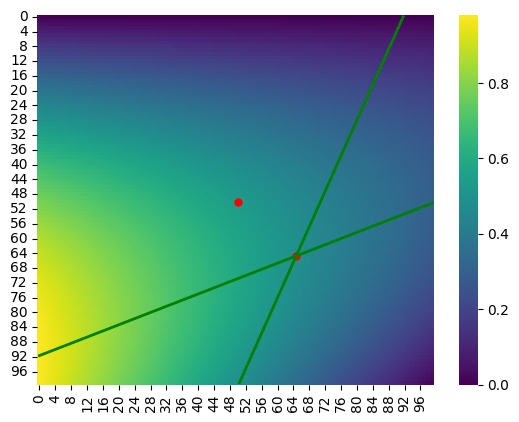

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(valDat, cmap='viridis', annot=False, fmt=".2f", cbar=True)
cour_i, cour_j = qCournot, qCournot
car_i, car_j = qCartel, qCartel  

xaxis = []
reacVal = []
for i in range(0, 100):
    xaxis.append(i+0.5)
    reacVal.append(((d - (i/100)) / (2 * (1+c)))*100 + 0.5)

plt.plot(reacVal, xaxis, color='green', linestyle='-', linewidth=2) 
plt.plot(xaxis, reacVal, color='green', linestyle='-', linewidth=2) # Adjust coordinates for the center of the cell

plt.scatter(cour_i*100 + 0.5, cour_j*100 + 0.5, color='red', marker='.', s=100)
plt.scatter(car_i*100 + 0.5, car_j*100 + 0.5, color='red', marker='.', s=100)   
plt.show()


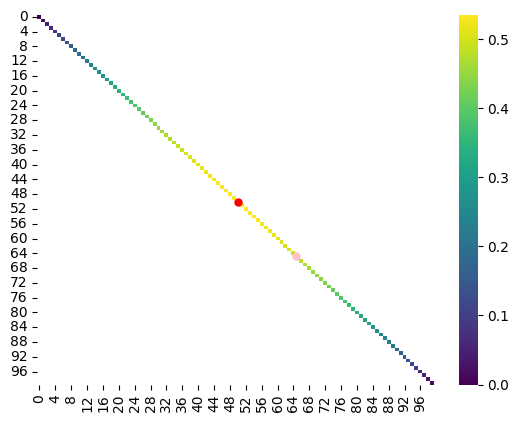

In [5]:
testValDat = valDat
for i in range(0, 100):
    for j in range(0, 100):
        if testValDat[i, j] != testValDat[j, i]:
            testValDat[i, j] = testValDat[j, i] = None

sns.heatmap(testValDat, cmap='viridis', annot=False, fmt=".2f", cbar=True)
plt.scatter(cour_i*100 + 0.5, cour_j*100 + 0.5, color='pink', marker='.', s=100)
plt.scatter(car_i*100 + 0.5, car_j*100 + 0.5, color='red', marker='.', s=100)  
plt.show()

In [6]:
prices = {}
for i in range(1, 1000):
    for j in range(1, 1000):
        prices[(i, j)] = price(i/1000, j/1000)

maxpelem = max(prices, key = lambda k: prices[k])
minpelem = min(prices, key = lambda k: prices[k])

print ("Max Price: ", [x/1000 for x in maxpelem], "Raw: ", prices[maxpelem], "Discounted: ", prices[maxpelem] * pricefactor)
print ("Min Price: ", [x/1000 for x in minpelem], "Raw: ", prices[minpelem], "Discounted: ", prices[minpelem] * pricefactor)

Max Price:  [0.001, 0.001] Raw:  2.1980000000000004 Discounted:  0.9891000000000002
Min Price:  [0.999, 0.999] Raw:  0.20200000000000007 Discounted:  0.09090000000000004


[0, 0.9166666666666667, 0.5347222222222223, 0.6938657407407408, 0.6275559413580247, 0.6551850244341565, 0.6436729064857682, 0.6484696222975966, 0.6464709907093349, 0.6473037538711106, 0.6469567692203707, 0.6471013461581789, 0.6470411057674256, 0.6470662059302394, 0.647055747529067, 0.6470601051962221, 0.6470582895015742, 0.6470590460410108, 0.6470587308162455, 0.6470588621598977, 0.6470588074333761, 0.6470588302360935, 0.6470588207349611, 0.6470588246937663, 0.6470588230442641, 0.6470588237315567, 0.6470588234451848, 0.6470588235645064, 0.6470588235147892, 0.6470588235355046, 0.6470588235268732, 0.6470588235304696, 0.6470588235289711, 0.6470588235295954, 0.6470588235293353, 0.6470588235294438, 0.6470588235293986, 0.6470588235294173, 0.6470588235294095, 0.6470588235294128, 0.6470588235294115, 0.647058823529412, 0.6470588235294117, 0.6470588235294119, 0.6470588235294118, 0.6470588235294119, 0.6470588235294118, 0.6470588235294119, 0.6470588235294118, 0.6470588235294119, 0.6470588235294118

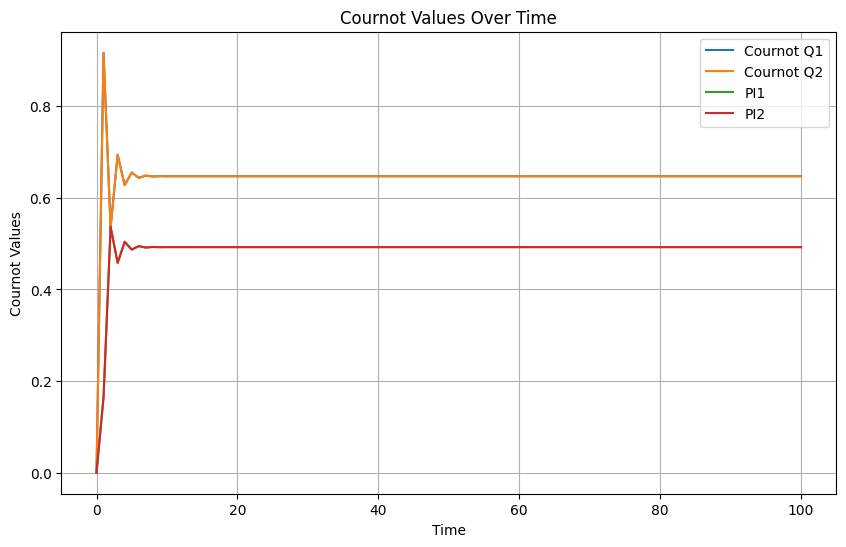

In [7]:
pastInteractiveCournotValues1 = [0]
pastInteractiveCournotValues2 = [0]
profitsInteractiveCournot1 = [0]
profitsInteractiveCournot2 = [0]
for i in range(0, 100):
    pastInteractiveCournotValues1.append((d-pastInteractiveCournotValues2[i]) / (2 *(1+c)))
    pastInteractiveCournotValues2.append((d-pastInteractiveCournotValues1[i]) / (2 *(1+c)))
    profitsInteractiveCournot1.append(profit(pastInteractiveCournotValues1[i+1], pastInteractiveCournotValues2[i+1]))
    profitsInteractiveCournot2.append(profit(pastInteractiveCournotValues2[i+1], pastInteractiveCournotValues1[i+1]))

print(pastInteractiveCournotValues1)
print(profitsInteractiveCournot1)
import matplotlib.pyplot as plt

# Plot Cournot values
plt.figure(figsize=(10, 6))
plt.plot(range(len(pastInteractiveCournotValues1)), pastInteractiveCournotValues1, label='Cournot Q1')
plt.plot(range(len(pastInteractiveCournotValues2)), pastInteractiveCournotValues2, label='Cournot Q2')
plt.plot(range(len(profitsInteractiveCournot1)), profitsInteractiveCournot1, label='PI1')
plt.plot(range(len(profitsInteractiveCournot2)), profitsInteractiveCournot2, label='PI2')
plt.title('Cournot Values Over Time')
plt.xlabel('Time')
plt.ylabel('Cournot Values')
plt.grid(True)
plt.legend()
plt.show()